# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold reponse info 
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | barra do garcas
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | bako
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | bedesa
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | hunza
City not found. Skipping...
Processing Record 10 of Set 1 | tunceli
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | cao bang
Processing Record 14 of Set 1 | nantucket
Processing Record 15 of Set 1 | toliary
City not found. Skipping...
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | tekkali
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | rungata
City not found. Skipping...
Processing

Processing Record 36 of Set 4 | leningradskiy
Processing Record 37 of Set 4 | tolbazy
Processing Record 38 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | asau
Processing Record 41 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 4 | allada
Processing Record 43 of Set 4 | norilsk
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | qabis
City not found. Skipping...
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | constitucion
Processing Record 0 of Set 5 | culfa
Processing Record 1 of Set 5 | phrai bung
City not found. Skipping...
Processing Record 2 of Set 5 | shagonar
Processing Record 3 of Set 5 | bembereke
Processing Record 4 of Set 5 | dubbo
Processing Record 5 of Set 5 | nhulunbuy
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 |

Processing Record 25 of Set 8 | tecpan
Processing Record 26 of Set 8 | ixtapa
Processing Record 27 of Set 8 | roald
Processing Record 28 of Set 8 | coihaique
Processing Record 29 of Set 8 | zyryanka
Processing Record 30 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 31 of Set 8 | sept-iles
Processing Record 32 of Set 8 | mersing
Processing Record 33 of Set 8 | taltal
Processing Record 34 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 8 | boca do acre
Processing Record 36 of Set 8 | dongsheng
Processing Record 37 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 38 of Set 8 | chardara
Processing Record 39 of Set 8 | octeville
Processing Record 40 of Set 8 | talcher
Processing Record 41 of Set 8 | awbari
Processing Record 42 of Set 8 | taos
Processing Record 43 of Set 8 | lata
Processing Record 44 of Set 8 | xiaolingwei
Processing Record 45 of Set 8 | the valley
Processing Record 46 of Set 8 | murray bridge
Processing R

Processing Record 15 of Set 12 | riyadh
Processing Record 16 of Set 12 | galle
Processing Record 17 of Set 12 | padang
Processing Record 18 of Set 12 | griffith
Processing Record 19 of Set 12 | pyaozerskiy
Processing Record 20 of Set 12 | lasa
Processing Record 21 of Set 12 | houma
Processing Record 22 of Set 12 | geresk
City not found. Skipping...
Processing Record 23 of Set 12 | eureka
Processing Record 24 of Set 12 | bataipora
Processing Record 25 of Set 12 | skelleftea
Processing Record 26 of Set 12 | taoudenni
Processing Record 27 of Set 12 | samarai
Processing Record 28 of Set 12 | canchungo
Processing Record 29 of Set 12 | lolua
City not found. Skipping...
Processing Record 30 of Set 12 | san policarpo
Processing Record 31 of Set 12 | damietta
Processing Record 32 of Set 12 | viligili
City not found. Skipping...
Processing Record 33 of Set 12 | kirkland lake
Processing Record 34 of Set 12 | deh rawud
City not found. Skipping...
Processing Record 35 of Set 12 | verkhnetulomskiy
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_data = pd.DataFrame(city_data)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,32.56,97,67,2.30,NZ,1659112987
1,new norfolk,-42.7826,147.0587,42.30,84,99,2.57,AU,1659112820
2,barra do garcas,-15.8900,-52.2567,90.18,29,0,11.50,BR,1659112987
3,hobart,-42.8794,147.3294,42.66,82,96,6.91,AU,1659112988
4,bako,5.7833,36.5667,67.59,70,90,3.00,ET,1659112988
...,...,...,...,...,...,...,...,...,...
549,kalmunai,7.4167,81.8167,80.08,82,100,10.94,LK,1659113139
550,quixeramobim,-5.1992,-39.2928,95.32,30,49,7.36,BR,1659113139
551,faya,18.3851,42.4509,71.71,56,93,6.82,SA,1659113140
552,gornopravdinsk,60.0500,69.9000,64.76,70,21,4.27,RU,1659113140


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
humidity_more_than_hundred = []
humidity_more_than_hundred.append(weather_data.loc[weather_data['Humidity'] >100] )
humidity_more_than_hundred

# As none of the cities in the data set has humidity more than hundred persent, no rows were cleaned in the dataframe
# weather_data

[Empty DataFrame
 Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
 Index: []]

In [6]:
#  Get the indices of cities that have humidity over 100%.

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

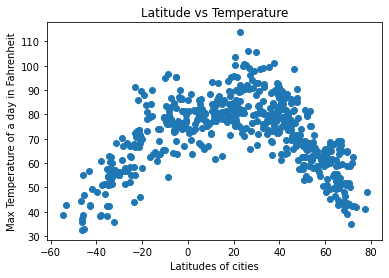

In [26]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitudes of cities')
plt.ylabel('Max Temperature of a day in Fahrenheit')
plt.show()

## Latitude vs. Humidity Plot

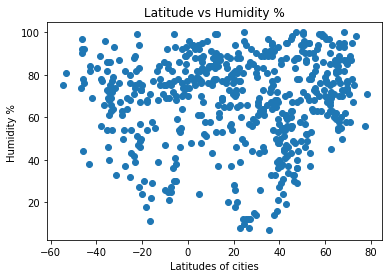

In [29]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitudes of cities')
plt.ylabel('Humidity % ')
plt.show()

## Latitude vs. Cloudiness Plot

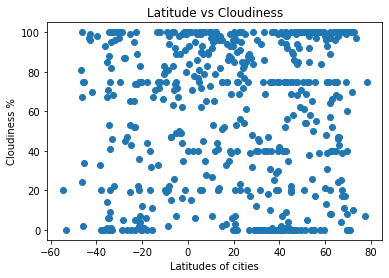

In [31]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitudes of cities')
plt.ylabel('Cloudiness %')
plt.show()

## Latitude vs. Wind Speed Plot

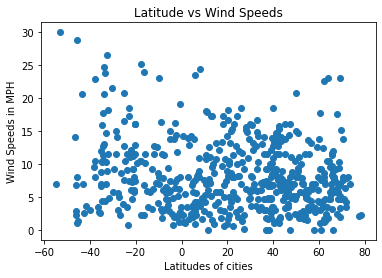

In [32]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('Latitude vs Wind Speeds')
plt.xlabel('Latitudes of cities')
plt.ylabel('Wind Speeds in MPH')
plt.show()

## Linear Regression

In [58]:
# Get all the cities on equator and the northern hemisphere 
weather_north = weather_data.loc[weather_data['Lat'] >= 0] 
weather_north

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,bako,5.7833,36.5667,67.59,70,90,3.00,ET,1659112988
5,tiksi,71.6872,128.8694,42.39,95,70,4.29,RU,1659112988
6,bedesa,8.9000,40.7833,67.08,76,89,1.70,ET,1659112989
7,sao filipe,14.8961,-24.4956,78.31,77,51,13.13,CV,1659112989
8,tunceli,39.1083,39.5471,83.07,16,0,2.55,TR,1659112989
...,...,...,...,...,...,...,...,...,...
548,surt,31.2089,16.5887,83.73,69,0,12.03,LY,1659113139
549,kalmunai,7.4167,81.8167,80.08,82,100,10.94,LK,1659113139
551,faya,18.3851,42.4509,71.71,56,93,6.82,SA,1659113140
552,gornopravdinsk,60.0500,69.9000,64.76,70,21,4.27,RU,1659113140


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43766314583892


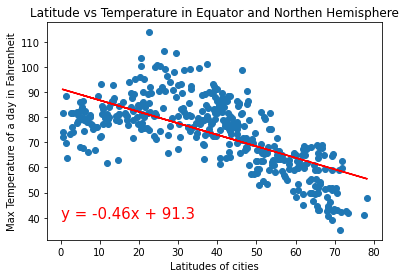

In [94]:
x_values = weather_north['Lat']
y_values = weather_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.title('Latitude vs Temperature in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Max Temperature of a day in Fahrenheit')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [87]:
# Get all the cities in the southern hemisphere 
weather_south = weather_data.loc[weather_data['Lat'] < 0] 
weather_south

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,32.56,97,67,2.30,NZ,1659112987
1,new norfolk,-42.7826,147.0587,42.30,84,99,2.57,AU,1659112820
2,barra do garcas,-15.8900,-52.2567,90.18,29,0,11.50,BR,1659112987
3,hobart,-42.8794,147.3294,42.66,82,96,6.91,AU,1659112988
9,hermanus,-34.4187,19.2345,54.81,68,88,17.74,ZA,1659112989
...,...,...,...,...,...,...,...,...,...
528,samarai,-10.6167,150.6667,78.67,86,79,12.55,PG,1659113133
536,victoria point,-27.5833,153.3000,58.17,82,87,3.00,AU,1659113136
541,lima,-12.0432,-77.0282,63.90,75,75,12.66,PE,1659112986
545,namibe,-15.1961,12.1522,63.91,77,67,5.91,AO,1659113138


The r-squared is: 0.6574008921243993


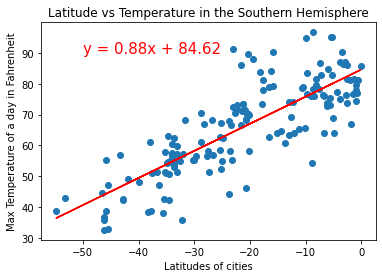

In [97]:
x_values = weather_south['Lat']
y_values = weather_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title('Latitude vs Temperature in the Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Max Temperature of a day in Fahrenheit')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0021798812558004583


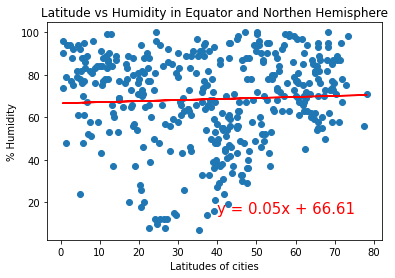

In [98]:
x_values = weather_north['Lat']
y_values = weather_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title('Latitude vs Humidity in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('% Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01779376694139832


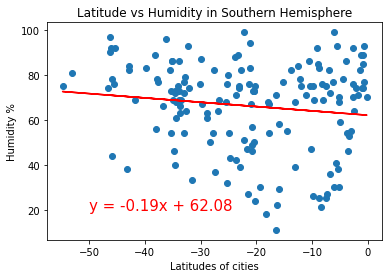

In [99]:
x_values = weather_south['Lat']
y_values = weather_south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015802556830053507


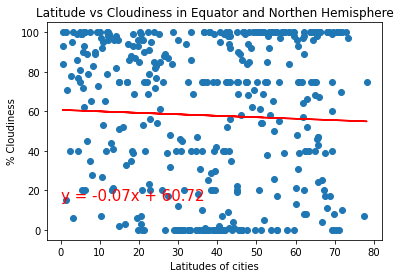

In [100]:
x_values = weather_north['Lat']
y_values = weather_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('% Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.025493552457370672


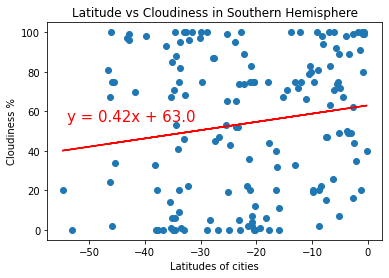

In [101]:
x_values = weather_south['Lat']
y_values = weather_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-54,55),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0029844044159309485


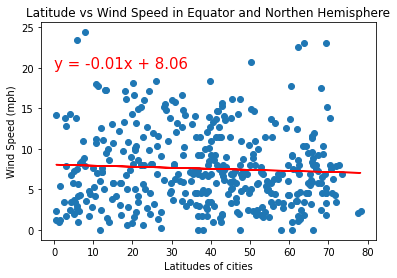

In [102]:
x_values = weather_north['Lat']
y_values = weather_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in Equator and Northen Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05053981082390945


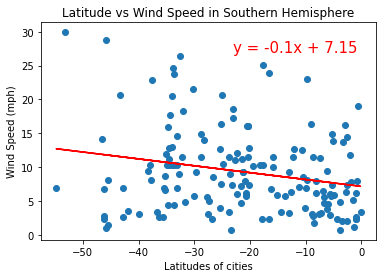

In [103]:
x_values = weather_south['Lat']
y_values = weather_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,27),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in Southern Hemisphere')
plt.xlabel('Latitudes of cities')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
## The cities in the data frame weather_data are from northern hemisphere, southern hemisphere and the equator.
## From regression graphs of all the cities, we can look at the regression values
## For the Northern hemisphere, the R**2 (r-squared) value is 0.43766314583892
## For the Southern hemiphere, the R**2 (r-sqaured) value is 0.6574008921243993
## If the regression is in the vicinity of 0.5, we can say that the correlation between the temperature and latitude 
## is very strong
## Therefore we can conclude that the temperatures are inversely proportional to
## the latitudes. The more the distance of a city from equator, the lesser is the temperature.

## All other measures like humidity, cloudiness and wind speed have no relationship with latitudes. This can be observed 
## in each graph above